In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
    'DoubleMuon_2018C',
]
fileset = utilities.make_fileset([samples[0]], "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    maxchunks=1,
    skipbadfiles=True,
    chunksize=10_000,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 4364) 
with [[0, 1], [0, 2], [], [1], [0, 1, 2, 3, 4], ..., [2], [2], [0, 1], [2, 3], [1]]: index out of range while 
attempting to get index 3 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


2Mu2E_500GeV_5p0GeV_8p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


In [3]:
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.4         22.4
PV filter                    59.8         22.4
>=2 LJs                      34.3         15.8
2mu2e                        34.1         15.8

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection               4364.0       4364.0
pass triggers              1633.0       1633.0
PV filter                  4364.0       1633.0
>=2 LJs                    2503.0       1154.0
2mu2e                      2489.0       1149.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.4          37.4            37.4
PV filter               100.0         100.0            37.4
>=2 LJs                  57.4          7

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdd2a55e510>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

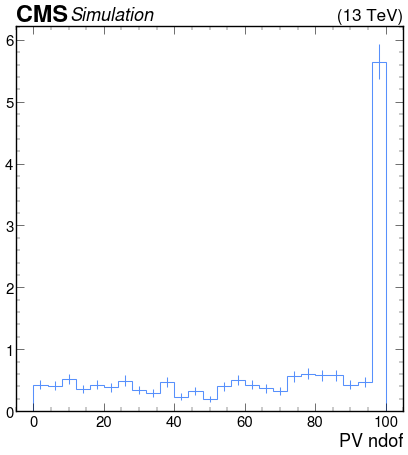

In [4]:
utilities.plot(out[samples[0]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fdd2b2fad50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fdd2a4f4320>, text=[])

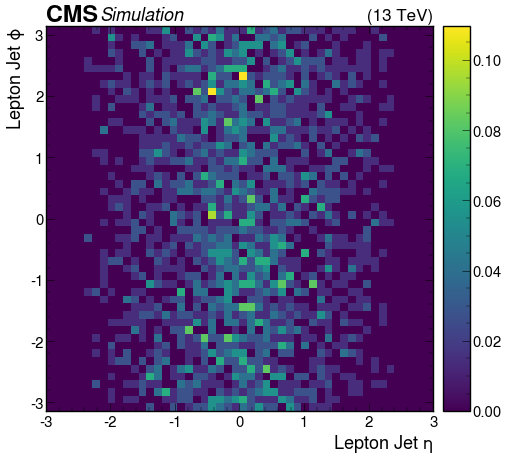

In [5]:
utilities.plot(out[samples[0]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdd2b3ab380>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

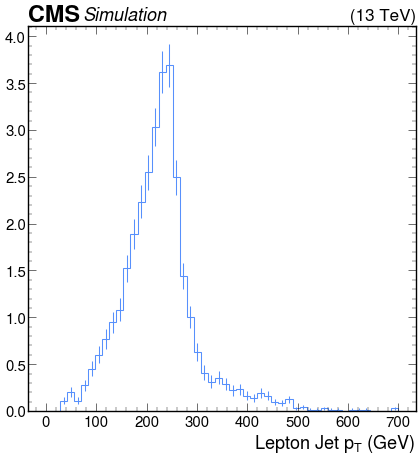

In [6]:
utilities.plot(out[samples[0]]["hists"]["lj_pt"][channels[0], ::2j])

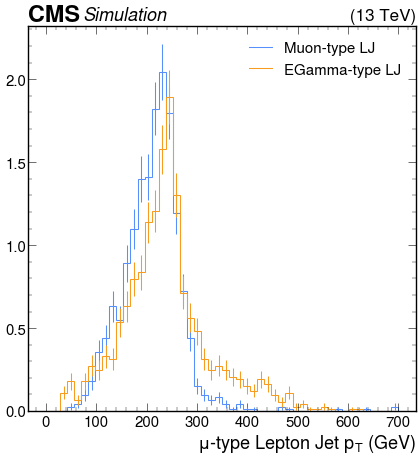

In [7]:
utilities.plot([
    out[samples[0]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


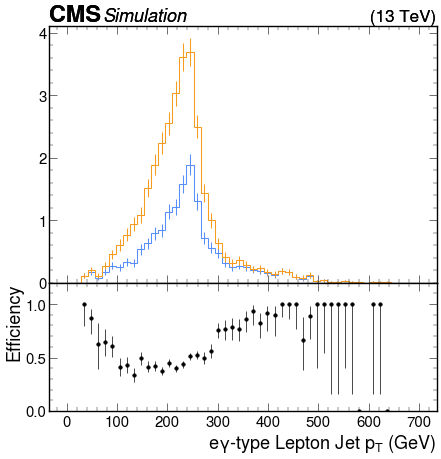

In [8]:
utilities.plot_ratio(
        out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[0]]["hists"]["lj_pt"]["2mu2e", ::2j],
)

In [9]:
# test processing of data. Note that we are only running over one file, so I am not worried about unblinding
fileset = utilities.make_fileset([samples[1]], "llpNanoAOD_v2", max_files=1, location_cfg="data.yaml")
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

Warning: weight not found in this sample. Skipping.

Warning: gens not found in this sample. Skipping.

Warning: genMus not found in this sample. Skipping.

Warning: genEs not found in this sample. Skipping.

Warning: genAs not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Warning: genMus not found in sample. The following cuts will not be applied: ['status 1']

Warning: genEs not found in sample. The following cuts will not be applied: ['status 1']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

DoubleMuon_2018C is data. Not scaling histograms or cutflows.


In [10]:
out[samples[1]]["cutflow"][channels[0]].print_table()
print()
out[samples[1]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[1]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              10982.0      10982.0
pass triggers              3078.0       3078.0
PV filter                 10971.0       3076.0
>=2 LJs                      10.0          2.0
2mu2e                         7.0          2.0

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              10982.0      10982.0
pass triggers              3078.0       3078.0
PV filter                 10971.0       3076.0
>=2 LJs                      10.0          2.0
2mu2e                         7.0          2.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            28.0          28.0            28.0
PV filter                99.9          99.9            28.0
>=2 LJs                   0.1           

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc67d7324b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

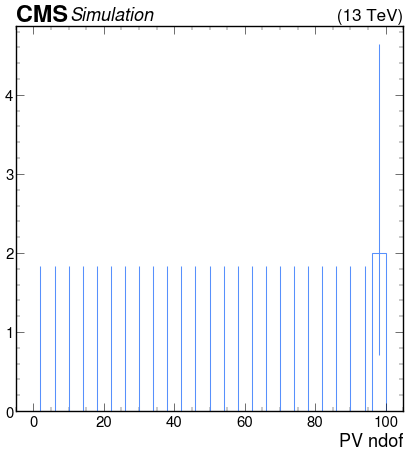

In [11]:
utilities.plot(out[samples[1]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fc67d785b20>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fc67de61d60>, text=[])

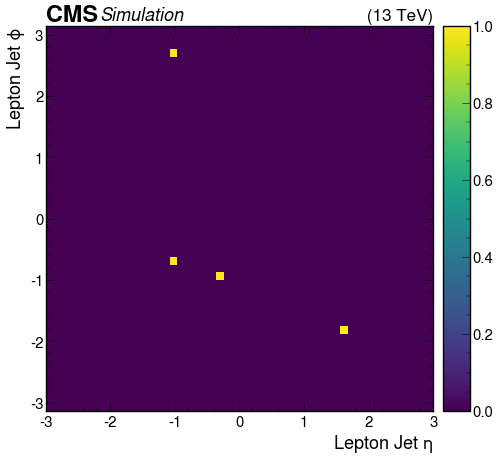

In [12]:
utilities.plot(out[samples[1]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc67e272870>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

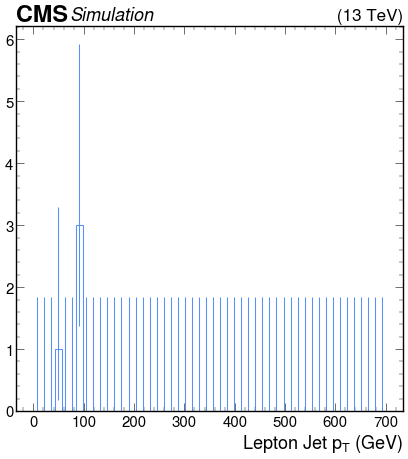

In [13]:
utilities.plot(out[samples[1]]["hists"]["lj_pt"][channels[0], ::2j])

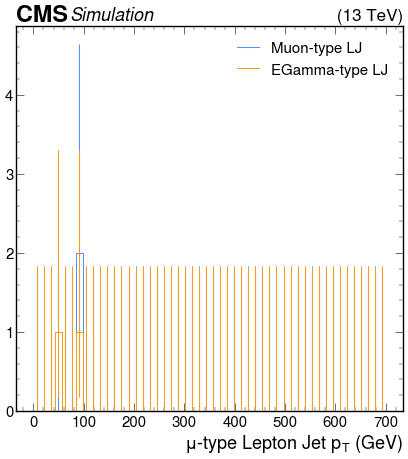

In [14]:
utilities.plot([
    out[samples[1]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[1]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


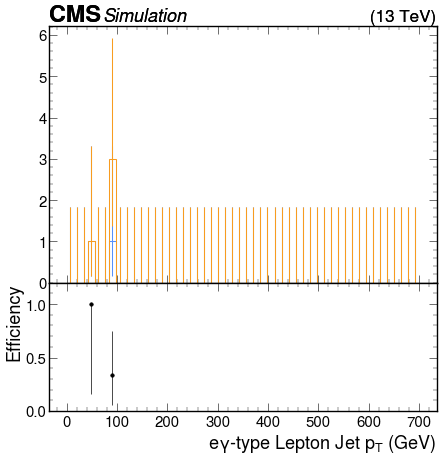

In [15]:
utilities.plot_ratio(
        out[samples[1]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[1]]["hists"]["lj_pt"]["2mu2e", ::2j],
)